<a href="https://colab.research.google.com/github/sadiqa682/PIAIC_Course/blob/main/Assignment3CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 Credit Card Fraud

In [1]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lillylord","key":"f2223d481309bf34a3bd19626dd59030"}'}

In [4]:
!mkdir -p ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-09 08:39:14           2320  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1337  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1028  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            480  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [8]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
#kaggle datasets download -d mlg-ulb/creditcardfraud

 76% 50.0M/66.0M [00:00<00:00, 51.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 113MB/s] 


In [9]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import tensorboard
from pylab import rcParams

In [11]:
from zipfile import ZipFile
file_name  = "creditcardfraud.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [12]:
# Loading The Data
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print(df.shape)

(284807, 31)


In [14]:
# # Configuring Modules
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale = 1.5)
rcParams['figure.figsize'] = 14, 8
Random_Seed = 42

In [15]:
# Renaming Columns
df.rename(columns = {"Class": "Fraud"}, inplace = True)

In [16]:
# Checking Data For Null Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Fraud     0
dtype: int64

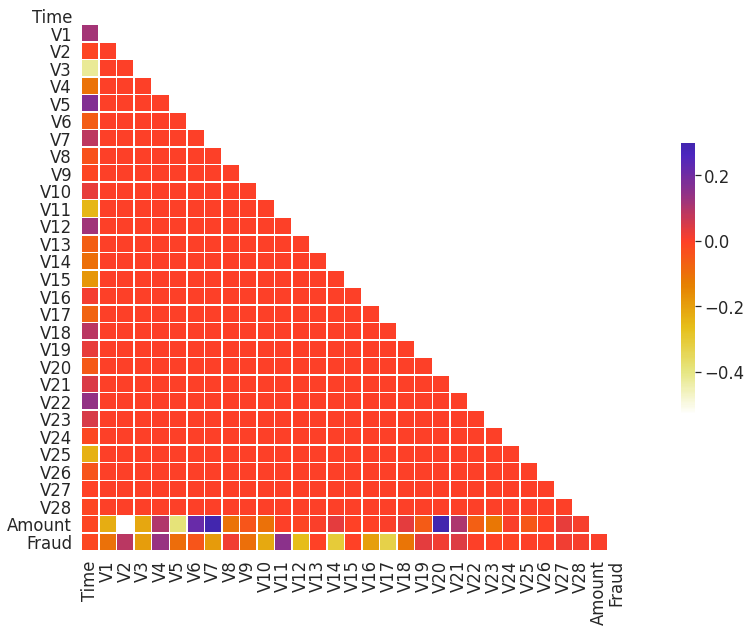

In [17]:
# Checking Correlations
corr = df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# figure size
f, ax = plt.subplots(figsize=(20, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='CMRmap_r', vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

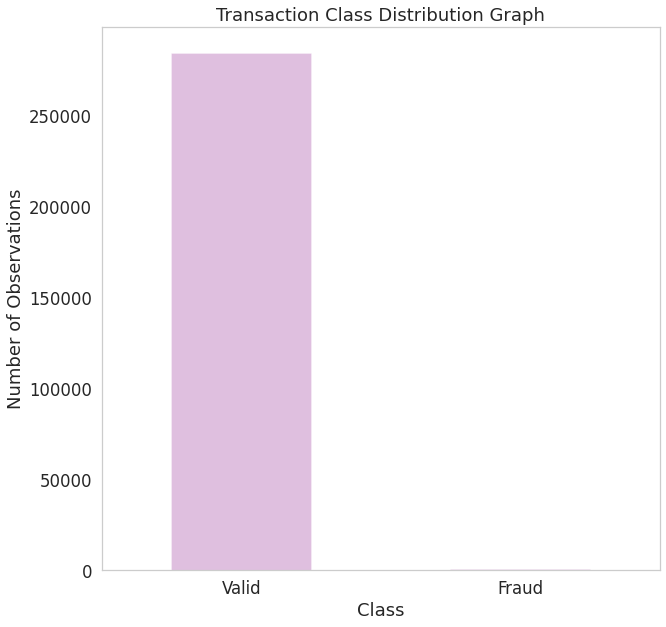

In [21]:
# Transaction Class Distribution Plot
labels = ['Valid', 'Fraud']
plt.figure(figsize = (10,10))
count_classes = pd.value_counts(df['Fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color = 'purple', alpha = 0.25)
plt.xticks(range(2), labels)
plt.title("Transaction Class Distribution Graph")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.grid()
plt.show()

In [22]:
len(df)

284807

In [23]:
len_fraud = len(df[df.Fraud ==  1])
len_fraud

492

In [24]:
len_valid = 284807 - 492
len_valid

284315

Out of 284807 transactions 284315 are the valid transactions

In [25]:
perc_fraud = (len_fraud * 100) / len(df)
perc_fraud

0.1727485630620034

##As you can see out of total transactions only 0.17 % are the fraud transactions.
# It means that we have highly Imbalance Dataset in our hands. There is a large margin between the valid transactions and the fraud transactions.

In [27]:
# Making DataFrames Of Valid And Fraud Transactions To Check Important Stats
Fraud_df = df[df.Fraud == 1]
Valid_df = df[df.Fraud == 0]

In [28]:
# Checking Important Stats of Amount used in Fraud Transactions
Fraud_df.Amount.describe().T

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

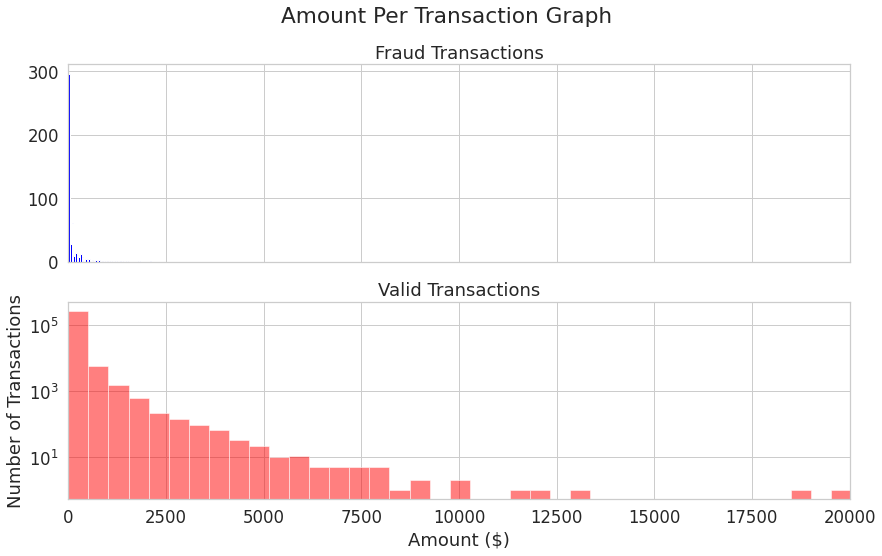

In [29]:
# Amount per transaction by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount Per Transaction Graph')

bins = 50

ax1.hist(Fraud_df.Amount, bins = bins, color='blue')
ax1.set_title('Fraud Transactions')

ax2.hist(Valid_df.Amount, bins = bins, color='red', alpha = 0.5)
ax2.set_title('Valid Transactions')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

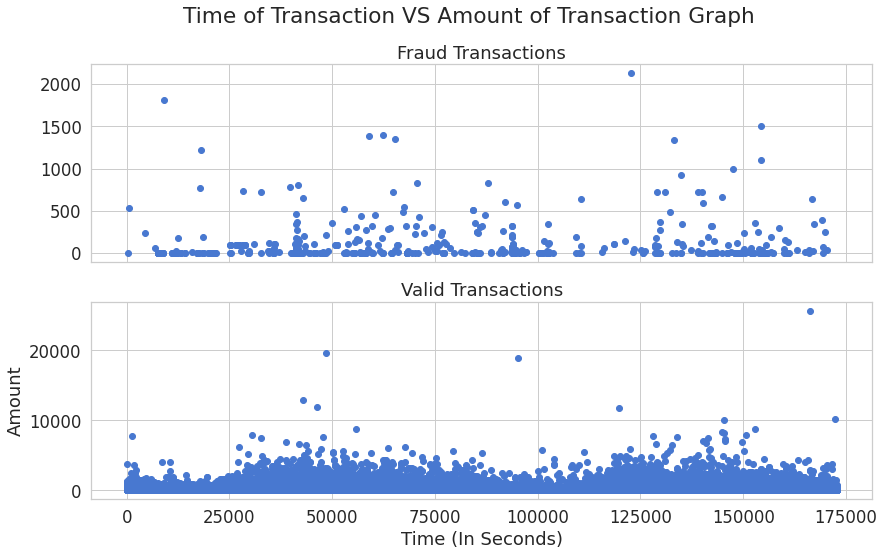

In [30]:
# Time of transaction vs Amount by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction VS Amount of Transaction Graph')

ax1.scatter(Fraud_df.Time, Fraud_df.Amount)
ax1.set_title('Fraud Transactions')

ax2.scatter(Valid_df.Time,Valid_df.Amount)
ax2.set_title('Valid Transactions')

plt.xlabel('Time (In Seconds)')
plt.ylabel('Amount')
plt.show()

In [31]:
# Normalizing Data
# We Need To Normalize Two Features: Time And Amount
from sklearn.preprocessing import StandardScaler
df_norm = df
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

Splitting Dataset Into Testing and Training Data

In [32]:
# Training Data
train_data = df_norm.iloc[:199365,:]
train_data.shape

(199365, 31)

In [33]:
# Testing Data
test_data = df_norm.iloc[199365:,:]
test_data.shape

(85442, 31)

In [34]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [35]:
# Shuffling Training And Testing Data
train_data = train_data.sample(frac=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
57112,-0.990857,-1.174485,1.441447,1.042781,-0.161490,-0.173503,-0.245683,0.204253,0.454105,-0.702409,-0.062903,1.610350,1.367207,0.807931,0.408991,0.152548,-0.006534,-0.193180,-0.258267,-0.218689,-0.036770,0.208407,0.471408,0.027831,0.261387,-0.509025,0.178174,-0.171117,0.144621,-0.346073,0
9710,-1.691896,1.101430,-0.162202,0.927627,0.227623,-0.708281,-0.153691,-0.578088,0.059882,1.448840,-0.407836,2.753506,-1.497222,1.704653,1.707450,0.113262,0.331903,0.394276,0.133207,-0.557004,-0.058361,0.040865,0.326155,0.005728,0.243643,0.069822,1.028265,-0.080475,-0.001598,-0.197304,0
162610,0.430174,2.006935,-0.026092,-1.102489,1.365067,-0.076097,-0.876611,0.075379,-0.178253,0.726989,0.293336,-1.271853,-0.552555,-1.630415,0.618358,0.198434,-0.198808,-0.310835,-0.025455,-0.460951,-0.384764,0.152847,0.586581,0.033276,-0.119450,0.239582,-0.450171,0.005586,-0.054836,-0.333239,0
9180,-1.720135,0.961947,-1.271395,1.189481,-0.277193,-1.606945,0.261155,-1.252502,0.191156,0.980034,0.207025,2.393160,-2.429197,1.192000,1.106909,-0.760718,1.045496,1.183902,-0.671714,0.064879,0.279624,0.336568,0.914418,-0.178395,0.207494,0.227386,-0.099694,0.003354,0.033188,0.302457,0
111995,-0.470515,-1.248311,0.047641,2.330262,1.184037,0.636999,-0.575883,-0.032903,0.200466,-0.607899,-0.332164,1.153838,1.153741,0.224437,0.048679,-0.656295,-0.553137,0.046429,0.121364,1.156998,0.321124,-0.062374,-0.329161,-0.029973,0.525950,0.323332,-0.442876,0.061509,0.093282,-0.273348,0


In [36]:
test_data = test_data.sample(frac = 1)
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
217869,0.974164,1.681630,-1.855775,0.148067,-0.567042,-1.983603,-0.327593,-1.296647,-0.034159,0.483598,0.560304,-0.718133,-0.024123,1.231068,-0.977503,0.588316,1.656077,-0.144196,-0.732808,0.092178,0.491983,0.572417,1.285624,-0.009597,0.114503,-0.478050,-0.121600,0.018904,0.009662,0.582323,0
248682,1.247348,-3.278252,-2.739360,1.523395,5.001722,1.329341,1.293375,0.483900,0.074132,-1.703530,1.676103,0.196721,-0.794973,-0.064722,0.011860,1.057901,0.793619,-0.658547,1.499759,1.548105,0.628516,0.178895,0.567447,1.102368,0.178061,0.549535,0.554028,-0.094698,0.117922,1.542903,0
261318,1.371842,1.831345,-0.323838,-0.449859,1.253513,-0.303681,0.011343,-0.416115,0.010320,0.806846,0.161626,-0.855897,0.493967,0.693306,-0.101564,0.821441,0.429457,-0.806984,0.258980,-0.826039,-0.049762,0.268713,0.770458,0.106404,0.674834,-0.084598,-0.598302,0.045642,-0.010713,-0.053373,0
281875,1.593456,1.919636,-0.350730,-1.327564,0.308874,0.046171,-0.588003,0.145349,-0.142974,0.395414,0.202947,0.561351,0.847095,-0.410533,0.516139,-0.804117,-0.003392,-0.476948,-0.322359,0.531555,-0.119926,-0.182475,-0.529768,0.190492,-0.388239,-0.229821,0.277265,-0.087874,-0.067945,-0.107187,0
239935,1.169434,-1.913955,0.258217,0.068211,1.008662,0.855771,2.141275,-0.665629,1.527680,-0.103029,-0.611712,0.217540,1.101605,-0.614592,0.590474,-0.756656,-1.167029,1.052332,-1.228240,0.634511,-0.801649,-0.346591,-0.520224,1.033759,-0.816778,-0.799370,-0.912146,0.020047,-0.084299,-0.221692,0


In [37]:
# Droping Labels From Training And Testing Data
train_labels = train_data.pop('Fraud')
# train_labels = train_labels.values
test_labels = test_data.pop('Fraud')
# test_labels = test_labels.values

In [38]:
test_labels

217869    0
248682    0
261318    0
281875    0
239935    0
         ..
235817    0
235555    0
239666    0
282194    0
208373    0
Name: Fraud, Length: 85442, dtype: int64

In [39]:
# Building Base Model
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = [len(train_data.keys())]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [40]:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpointer = ModelCheckpoint(filepath = 'CreditCardFraudDetectionModel.h5', verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 0, write_graph = True, write_images = True)

In [41]:
# Fitting Base Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 32, shuffle=True, validation_split=0.2, verbose = 1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
4985/4985 [==============================] - 8s 1ms/step - loss: 0.0700 - accuracy: 0.9842 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 2/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 3/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 4/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 5/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 6/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 7/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0044 - val_ac

In [42]:
# Storing History In A Data Frame
history_df = pd.DataFrame(history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.001224,0.999530,0.007436,0.999197
96,0.001122,0.999549,0.007387,0.999273
97,0.001072,0.999567,0.007663,0.999122
98,0.001140,0.999523,0.007737,0.999248
99,0.001222,0.999542,0.008412,0.998871


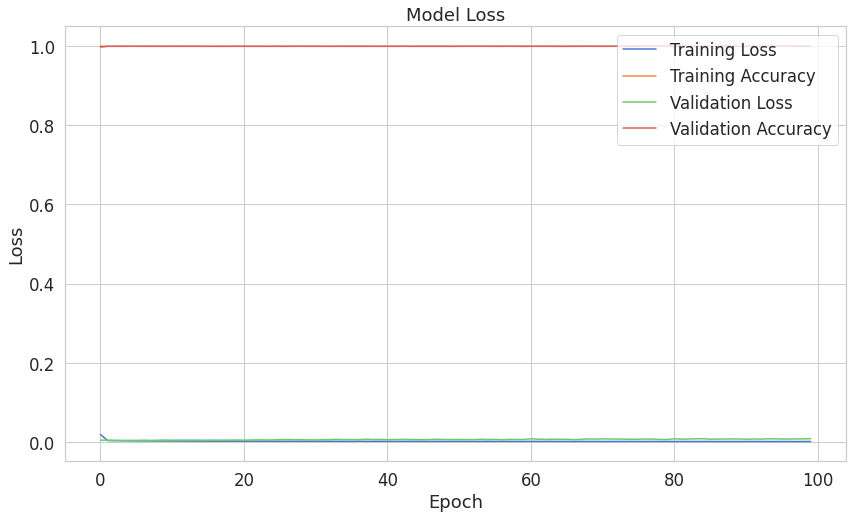

In [43]:
# Plotting Loss and Accuracy
plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_loss'])
plt.plot(history_df['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy'], loc='upper right');

In [44]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions = predictions.flatten()

In [45]:
predictions

array([2.4498124e-15, 2.3406982e-10, 3.6730620e-07, ..., 6.1521357e-11,
       3.3280867e-09, 9.0354346e-09], dtype=float32)

In [46]:
# Testing Model On Testing Data
testing = model.evaluate(test_data, test_labels)

2671/2671 [==============================] - 2s 851us/step - loss: 0.0112 - accuracy: 0.9986


In [47]:
print(f"Test Loss: {testing[0]}")
print(f"Test Accuracy: {testing[1]}")

Test Loss: 0.011179838329553604
Test Accuracy: 0.9986423254013062


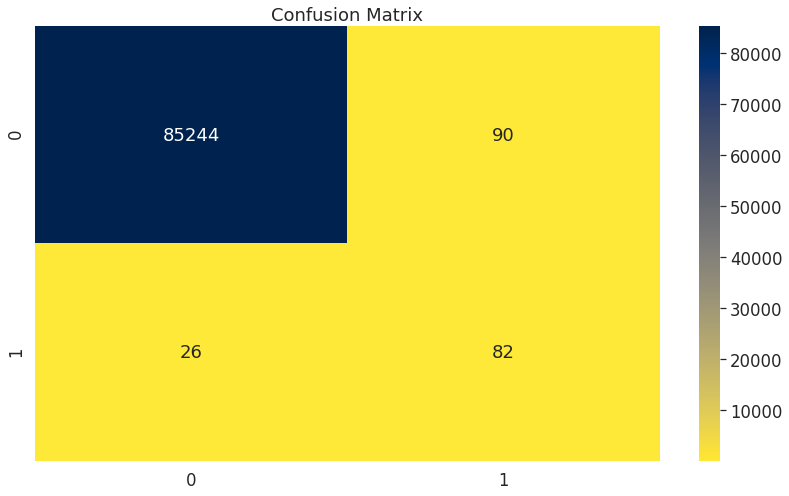

In [48]:
# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
# y_pred = model.predict(X_test)
y_test = pd.DataFrame(testing)
cm = confusion_matrix(test_labels, predictions.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Confusion Matrix")
plt.show()

#Unbalanced Data


### As we can see that our model is overfitted because it is most probably unable to discriminate between valid transactions and fraud transactions because the mass of fraud transactions is very low as compared to the valid transactions and our model can treat them as normal transactions. Lets overcome this problem.

# Building Second Model For Overcoming Unbalanced Data Problem

### There are many techniques to solve this problem but here I am using SMOTE Algorithm. SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [49]:
# Checking Dataset To Ensure That It IS Not Changed
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [50]:
# Standardizing The Amount Feature
df['NormAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)

In [51]:
# Separating Test Data
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

In [52]:
# Importing SMOTE 
from imblearn.over_sampling import SMOTE
np.random.seed(9)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
